# Define the Data set

In [171]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [173]:
df = pd.read_csv('C:/Users/Namalgamuwa/Documents/MSc 1st Sem/ML 01/DiabetesData.csv')

In [175]:
df.shape

(768, 9)

In [177]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

Distribution of the Variables

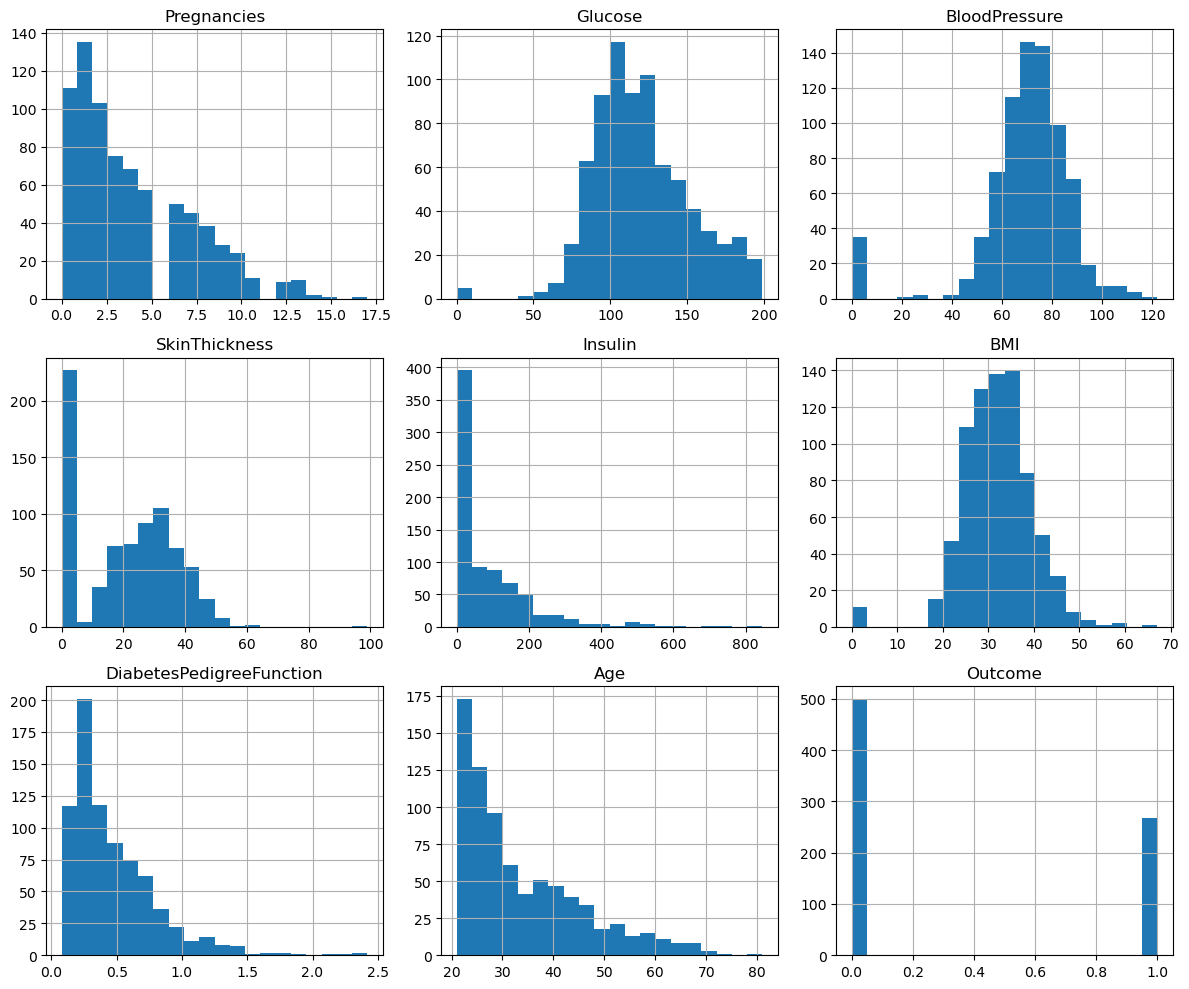

In [85]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
# Create a bar plot
df.plot(kind='bar', subplots=True, layout=(2,2), figsize=(10, 10), sharex=False)
plt.tight_layout()
plt.show()

In [36]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Check Missing Values

In [89]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outliers Detection

<Axes: title={'center': 'Box Plots of Variables'}, ylabel='Values'>

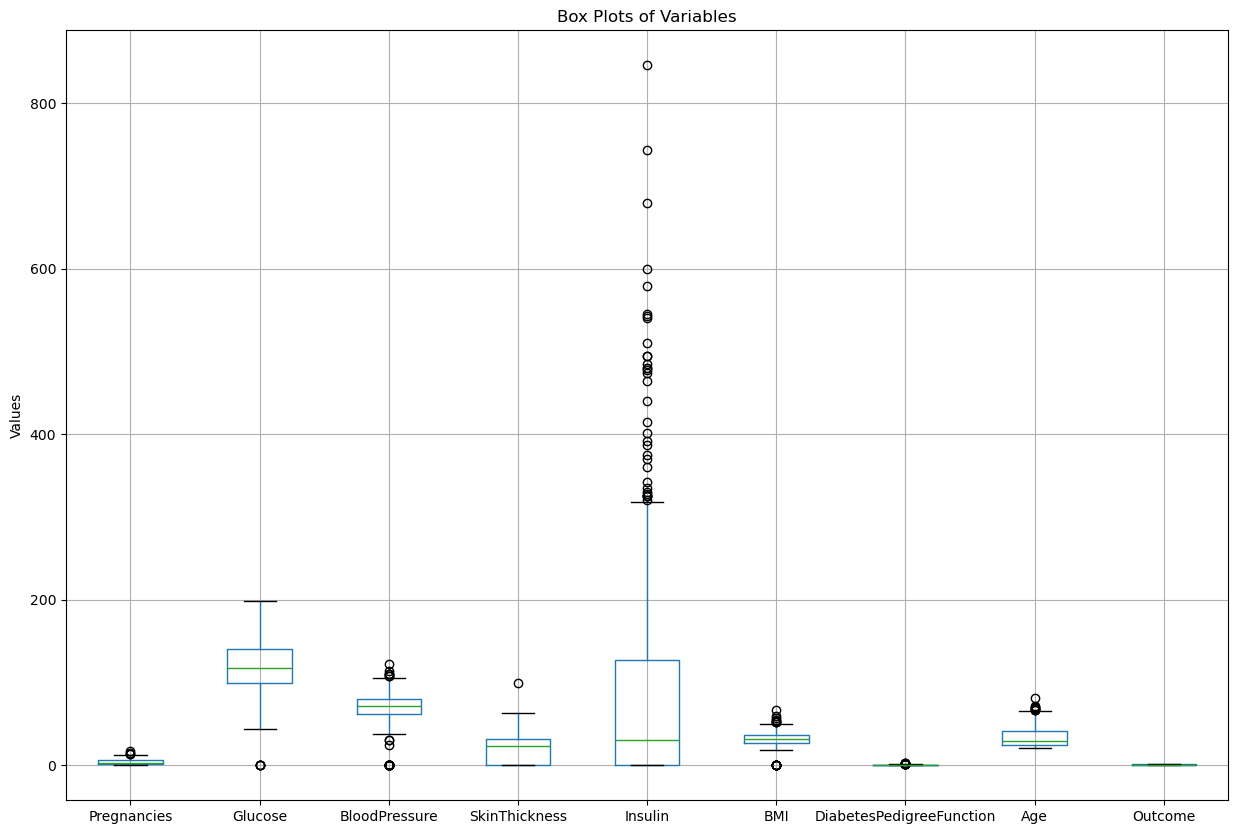

In [91]:
#boxplot
plt.figure(figsize=(15, 10))
plt.title('Box Plots of Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
df.boxplot()

In [104]:
# calculate IQR
def calculate_iqr(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    return IQR

# Apply the IQR calculation to each numerical column
iqr_values = df.apply(calculate_iqr)

print("IQR for each variable:")
print(iqr_values)

IQR for each variable:
Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


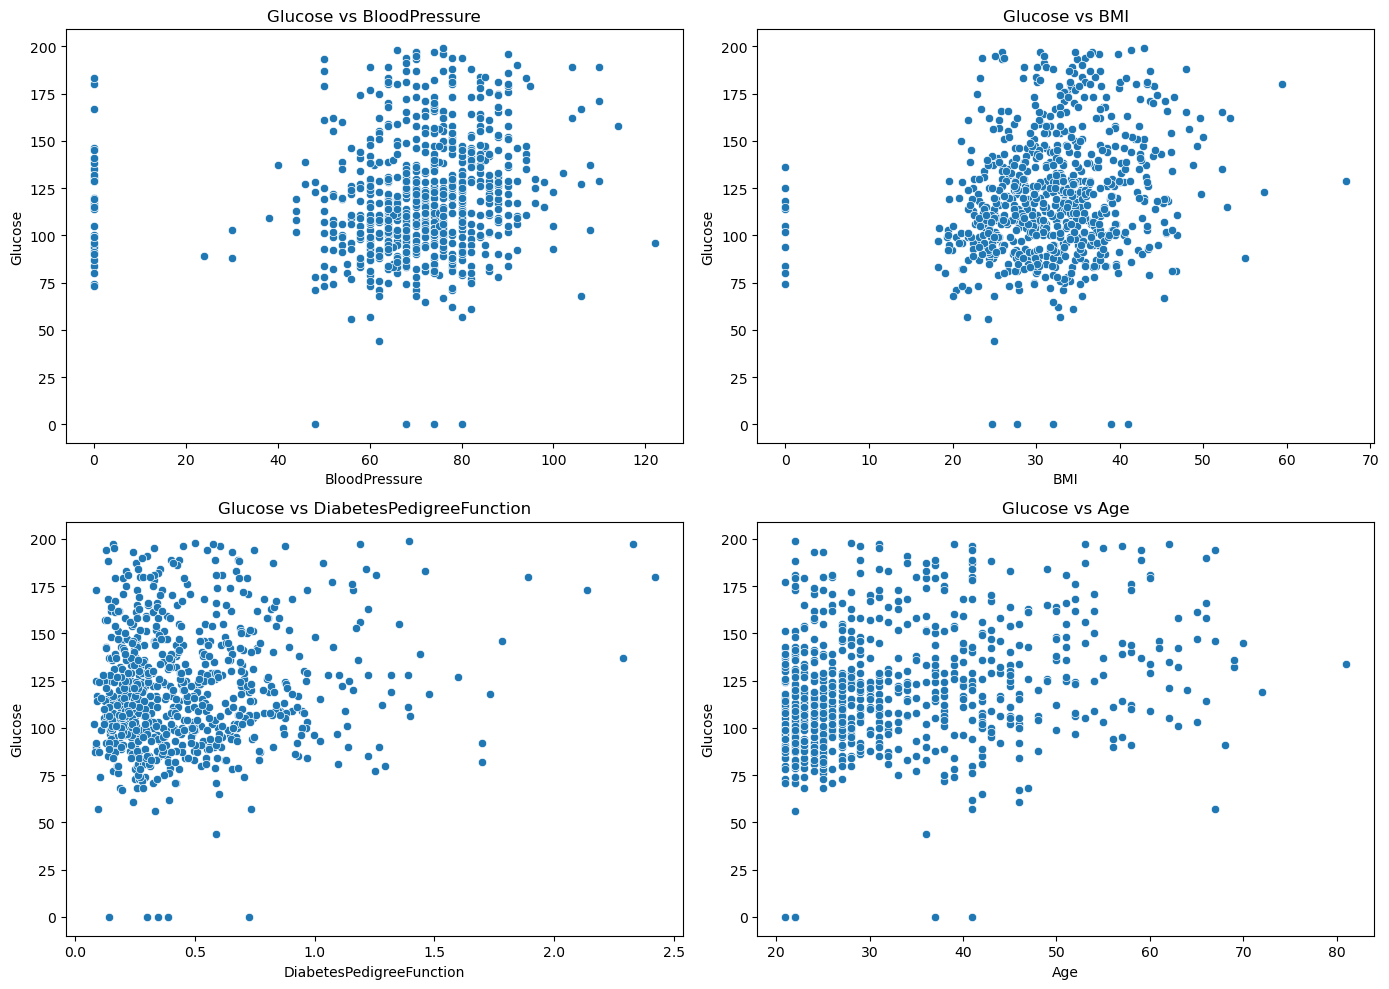

In [116]:
# scatter plots for analyze the relationship between variables
plt.figure(figsize=(14, 10))

for x, column in enumerate(['BloodPressure', 'BMI','DiabetesPedigreeFunction', 'Age']):
    plt.subplot(2, 2, x + 1)
    sns.scatterplot(x=df[column], y=df['Glucose'])
    plt.title(f'Glucose vs {column}')
    plt.xlabel(column)
    plt.ylabel('Glucose')
plt.tight_layout()
plt.show()

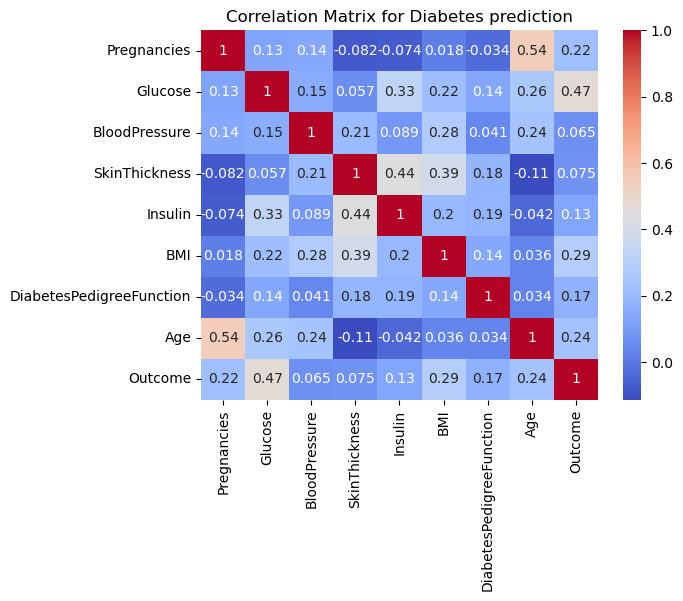

In [118]:
# Heat map for visualize the relationships between variables 
numeric_columns=df.select_dtypes(include=['number'])
correlation_matrix=numeric_columns.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Diabetes prediction")
plt.show()

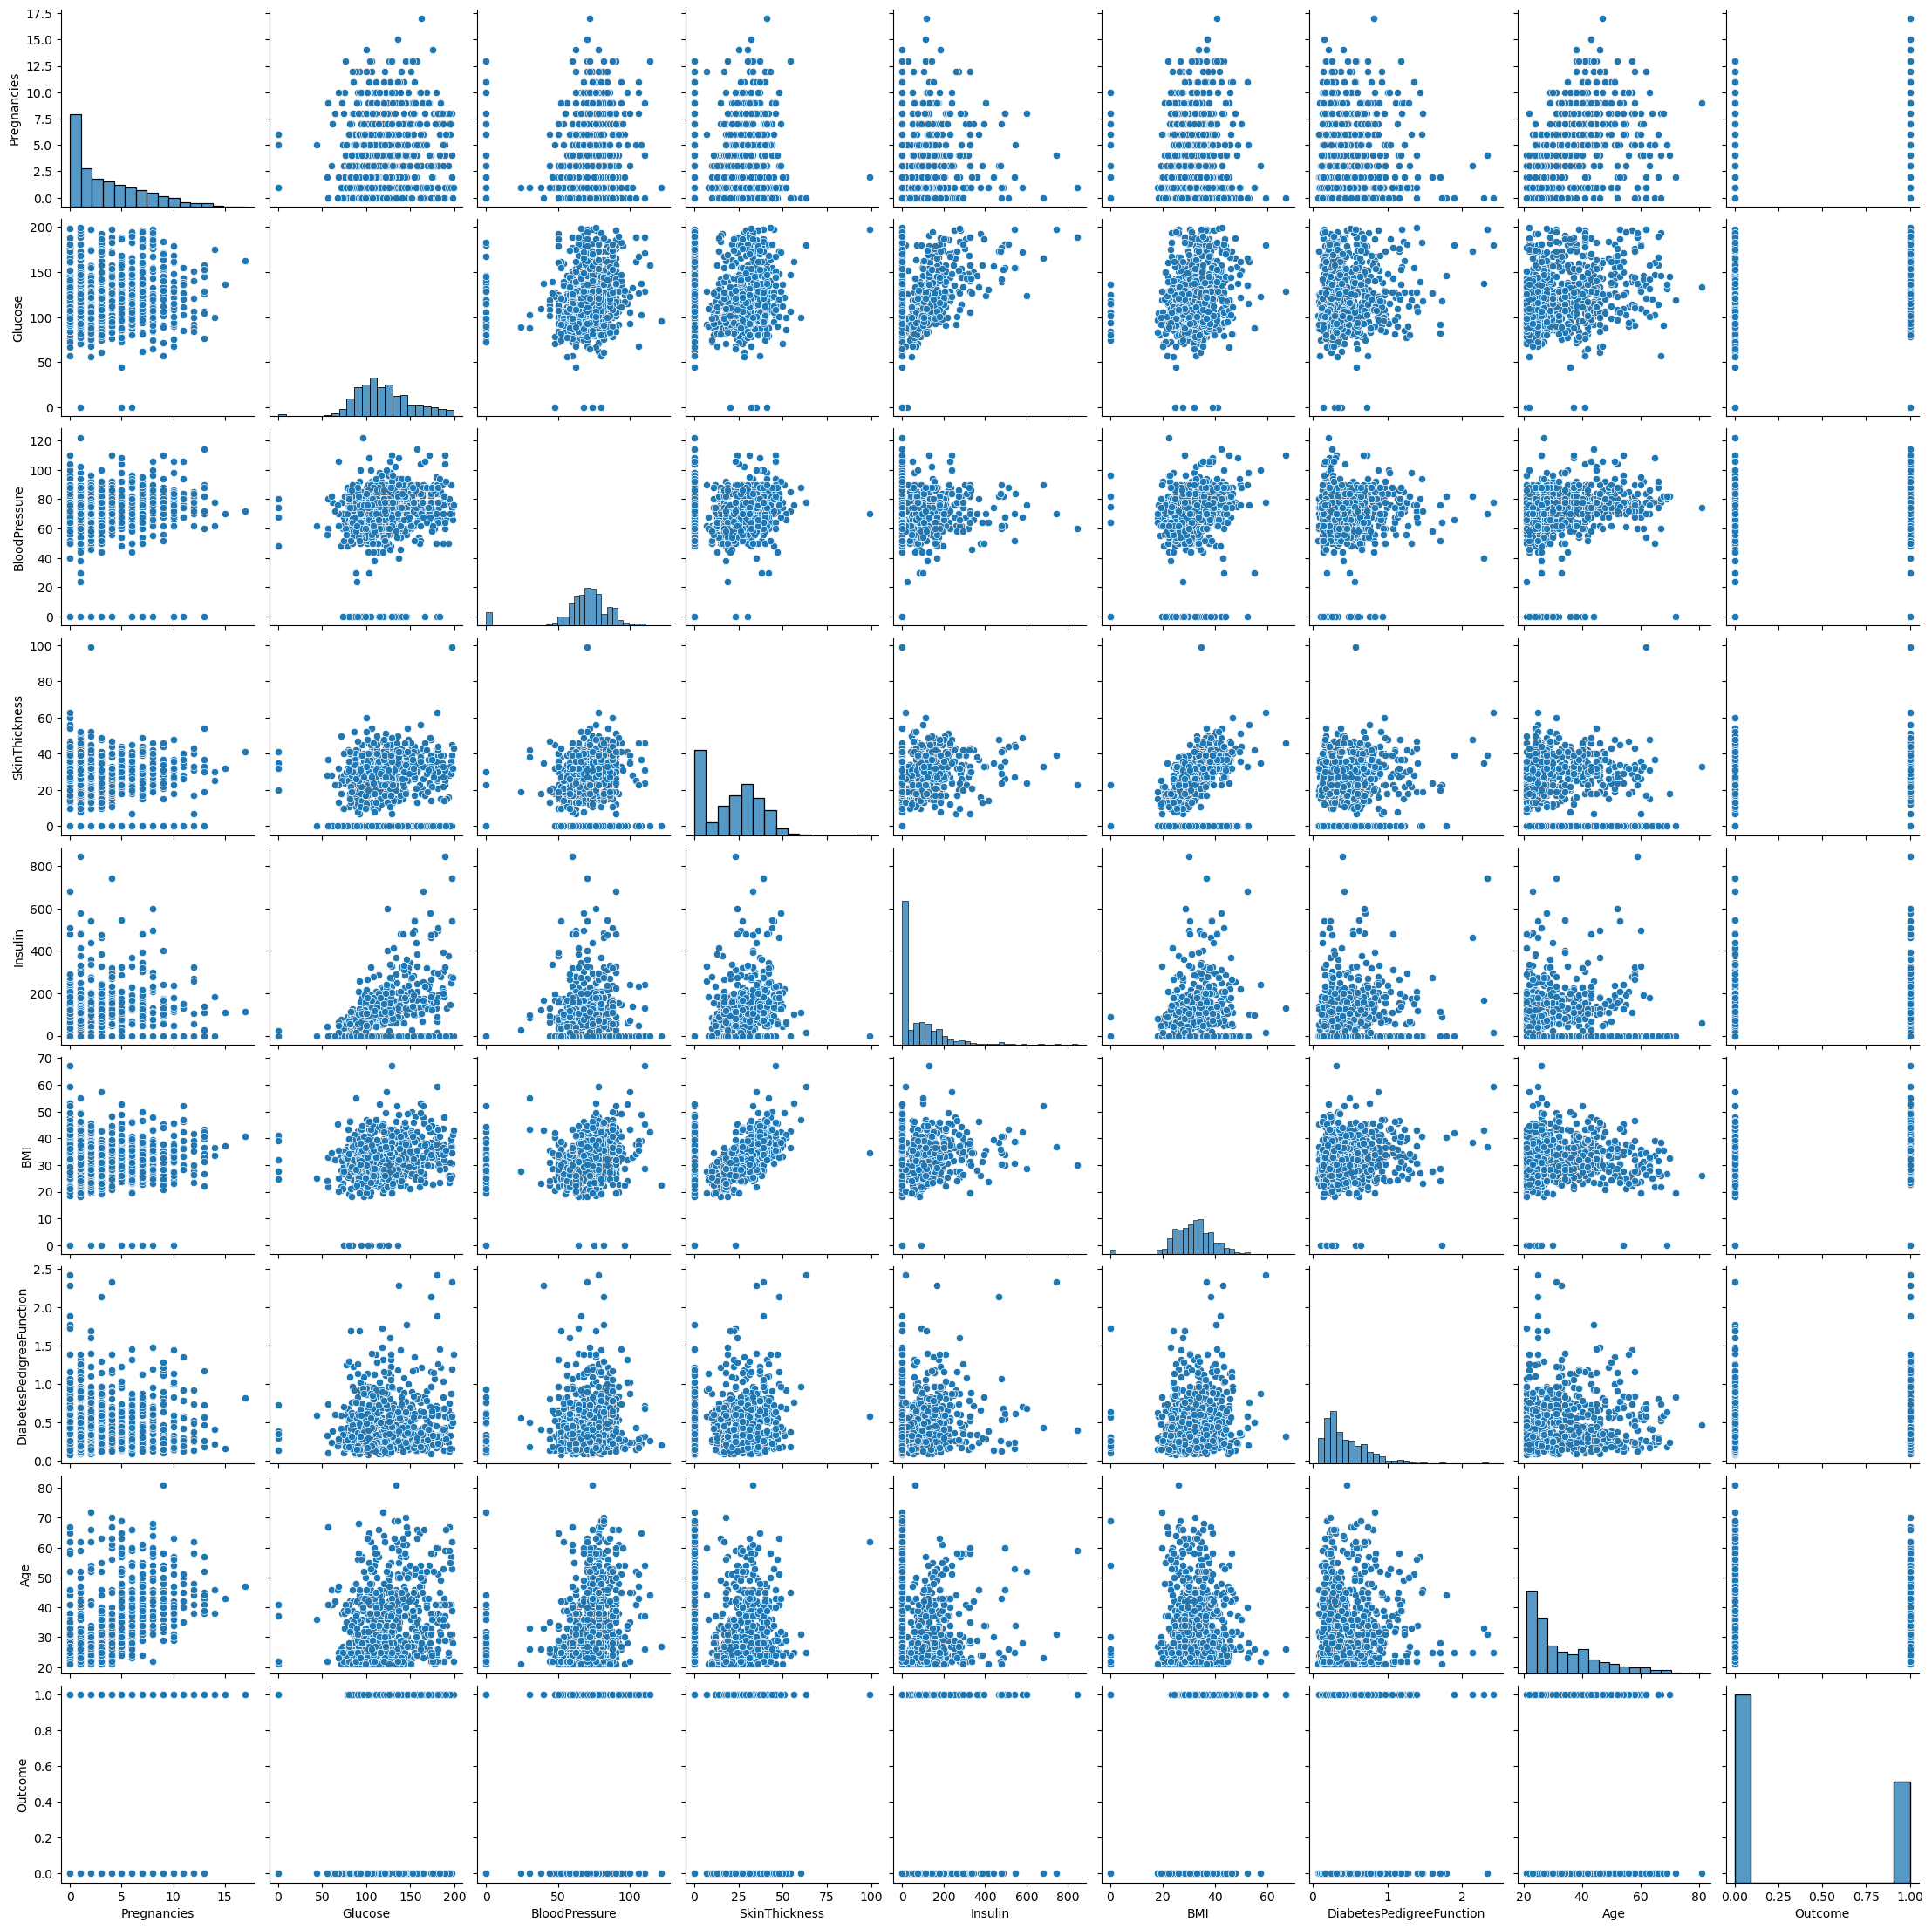

In [120]:
#Pairplot to determine relationships with each pair of diabetes factors
sns.pairplot(df)
plt.show()

# Data Preprocessing

Feature Selection

In [127]:
#Apply Tree-Based Model
X = df[['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']]  # Features
y = df['Outcome']            # Target variable
        
# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(importance_df)

                    Feature  Importance
0               Pregnancies    0.083368
1                   Glucose    0.352579
2             BloodPressure    0.114795
3             SkinThickness    0.068697
4                   Insulin    0.068119
5  DiabetesPedigreeFunction    0.155788
6                       Age    0.156654


In [131]:
# Apply Univariate Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Get scores for each feature
scores = selector.scores_
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print(feature_scores_df)

                    Feature       Score
0               Pregnancies   39.670227
1                   Glucose  213.161752
2             BloodPressure    3.256950
3             SkinThickness    4.304381
4                   Insulin   13.281108
5  DiabetesPedigreeFunction   23.871300
6                       Age   46.140611


# Split the Data into Train, Test, and Validation Sets

In [243]:
from sklearn.model_selection import train_test_split
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

# Print the shapes of the resulting datasets
print(f"Training Data Shape: {train.shape}")
print(f"Validation Data Shape: {valid.shape}")
print(f"Testing Data Shape: {test.shape}")


Training Data Shape: (460, 9)
Validation Data Shape: (154, 9)
Testing Data Shape: (154, 9)


C:\Users\Namalgamuwa\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [245]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
# scale the dataset
def scale_dataset(dataframe,oversample=False):
    # Assuming the last column is the target variable 'y'
    X = dataframe[dataframe.columns[:-1]].values  # Select all columns except the last one
    y = dataframe[dataframe.columns[-1]].values   # Select the last column as the target

    # Initialize StandardScaler
    scaler = StandardScaler()
    
    # Fit and transform the features
    X= scaler.fit_transform(X)

    #Oversampling
    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y)
        
    
    # Combine the scaled features and target variable into one array
    data = np.hstack((X, np.reshape(y, (-1, 1))))


    return data, X, y


In [247]:
train,X_train,y_train=scale_dataset(train,oversample=True)
valid,X_valid,y_valid=scale_dataset(valid,oversample=False)
test,X_test,y_test=scale_dataset(test,oversample=False)

# Model Selection

KNN

In [269]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [279]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [281]:
# Make predictions on the test data
y_pred = knn_model.predict(X_test)

In [283]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



In [255]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [510]:
#evaluate how well model performs on unseen data
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[84 15]
 [16 39]]


Naive Bayes

In [287]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [293]:
# Make predictions on the test data
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        99
           1       0.71      0.71      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [508]:
#evaluate how well model performs on unseen data
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[84 15]
 [16 39]]


Logistic Regression

In [297]:
from sklearn.linear_model import LogisticRegression

In [299]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [301]:
# Make predictions on the test data
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [506]:
#evaluate how well model performs on unseen data
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[84 15]
 [16 39]]


SVM

In [303]:
from sklearn.svm import SVC

In [305]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [307]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154



In [504]:
#evaluate how well model performs on unseen data
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[84 15]
 [16 39]]


Random Forest

In [311]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [313]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [502]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[84 15]
 [16 39]]


Neural Network

In [321]:
!pip install tensorflow

In [322]:
import tensorflow as tf

In [474]:
def plot_loss(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.show()


In [476]:
import tensorflow as tf

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    # Define the model architecture
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
    ])

    # Compile the model
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Train the model
    history = nn_model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )
    
    # Return the trained model and history object
    return nn_model, history


Testing with 16 nodes, dropout 0, lr 0.01, batch_size 32


C:\Users\Namalgamuwa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


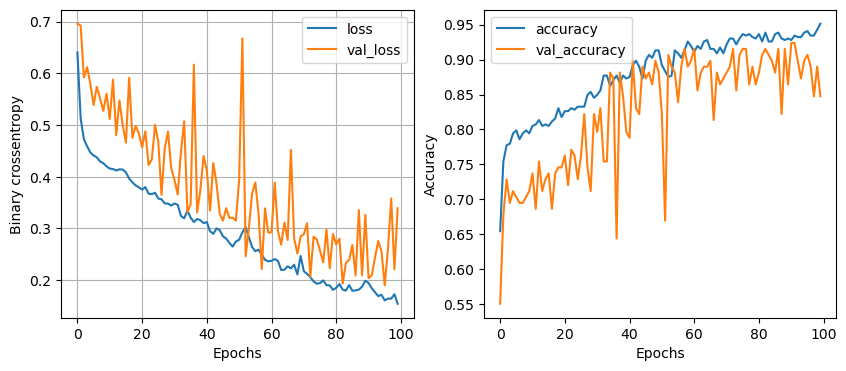

Testing with 16 nodes, dropout 0, lr 0.01, batch_size 64


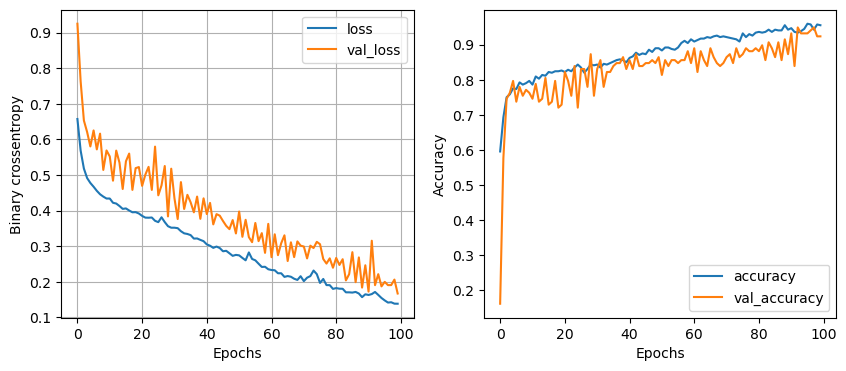

Testing with 16 nodes, dropout 0, lr 0.01, batch_size 128


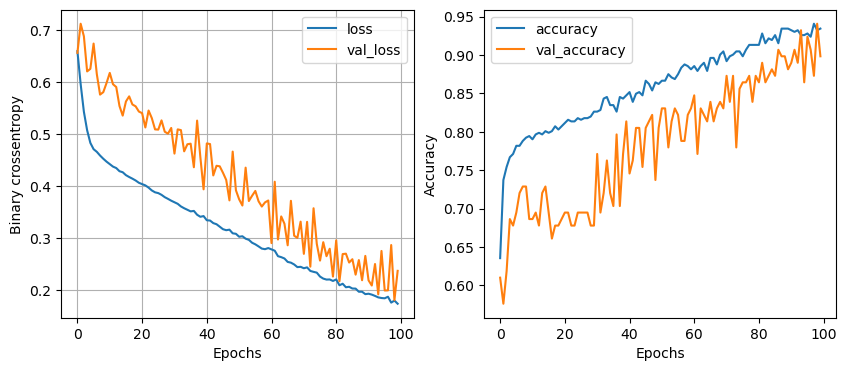

Testing with 16 nodes, dropout 0, lr 0.005, batch_size 32


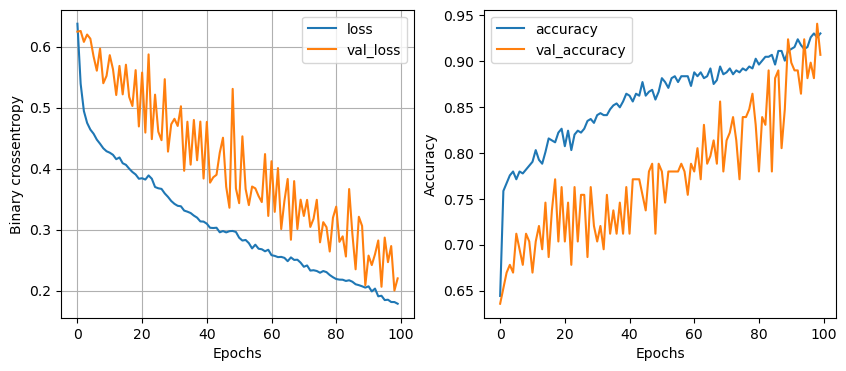

Testing with 16 nodes, dropout 0, lr 0.005, batch_size 64


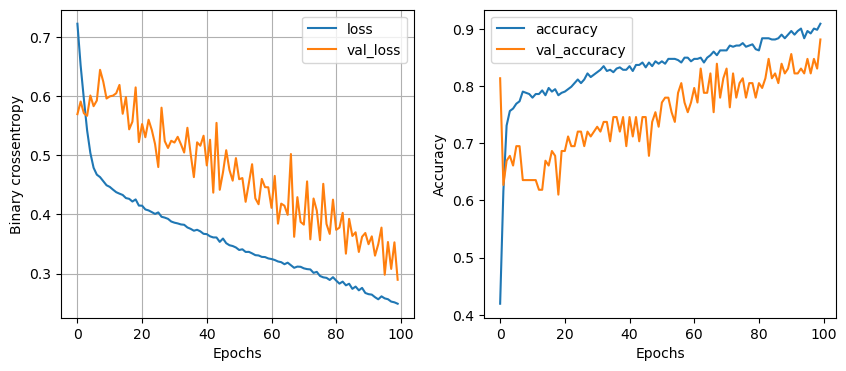

Testing with 16 nodes, dropout 0, lr 0.005, batch_size 128


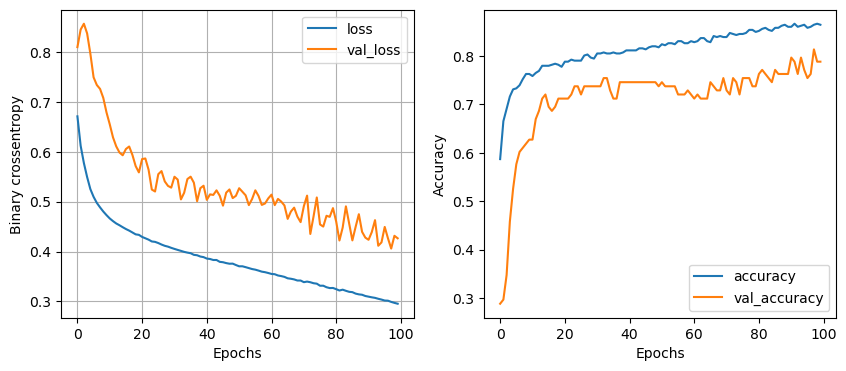

Testing with 16 nodes, dropout 0, lr 0.001, batch_size 32


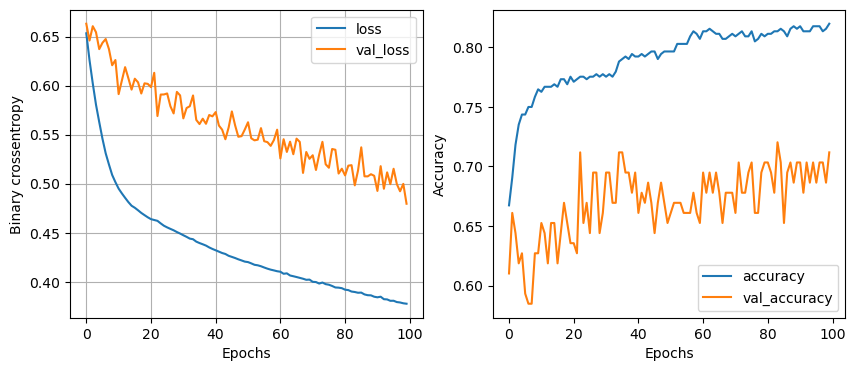

Testing with 16 nodes, dropout 0, lr 0.001, batch_size 64


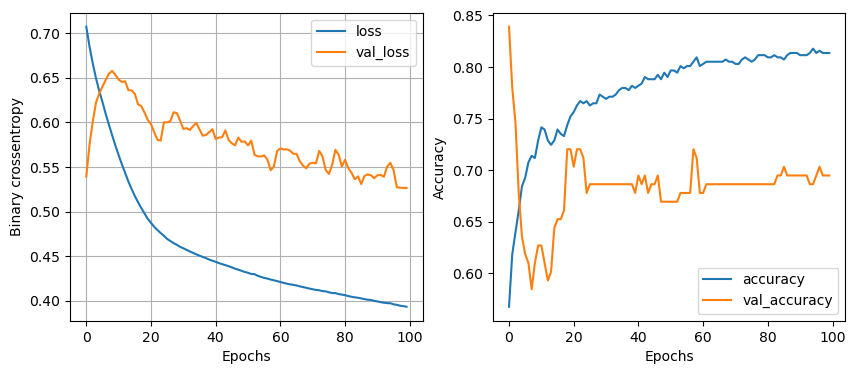

Testing with 16 nodes, dropout 0, lr 0.001, batch_size 128


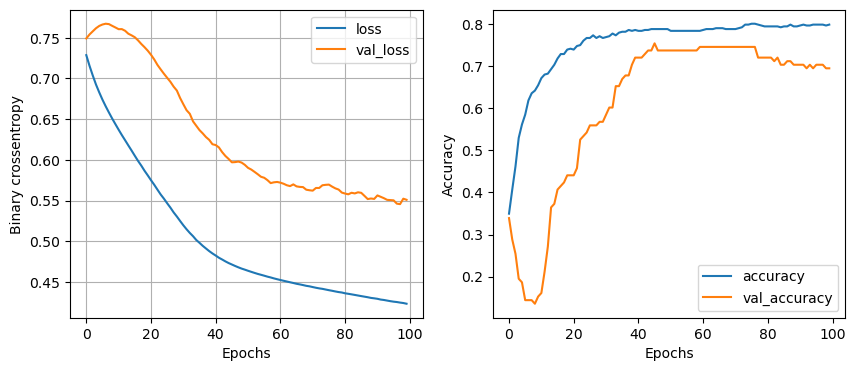

Testing with 16 nodes, dropout 0.2, lr 0.01, batch_size 32


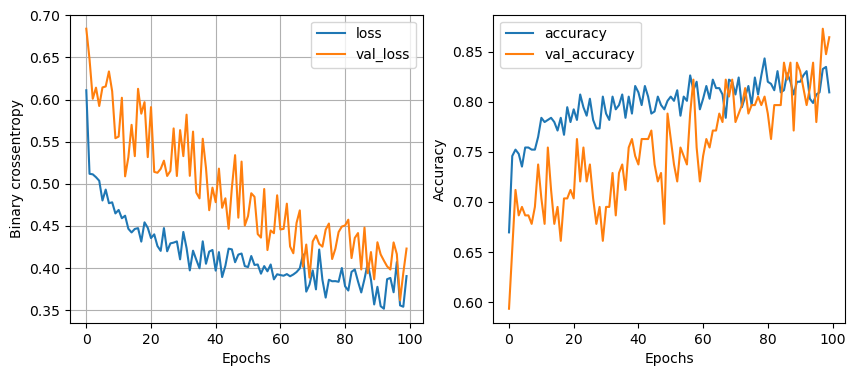

Testing with 16 nodes, dropout 0.2, lr 0.01, batch_size 64


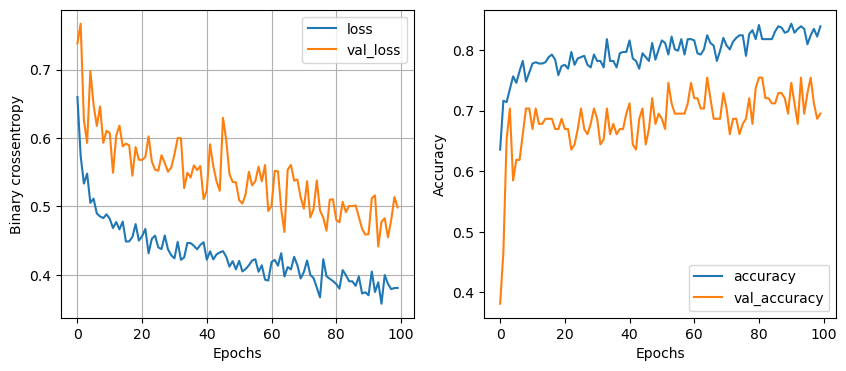

Testing with 16 nodes, dropout 0.2, lr 0.01, batch_size 128


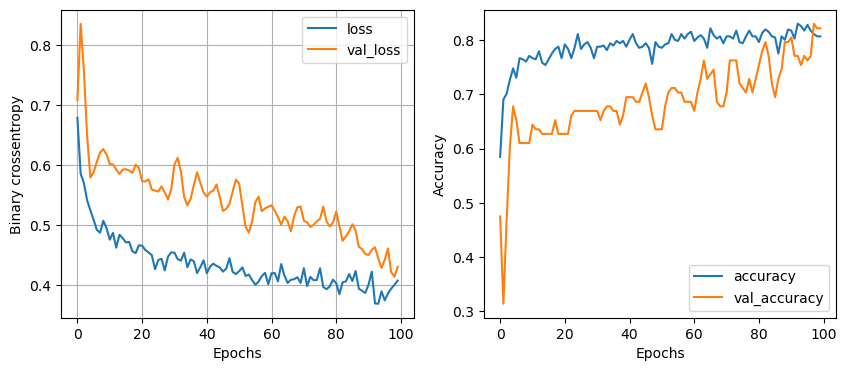

Testing with 16 nodes, dropout 0.2, lr 0.005, batch_size 32


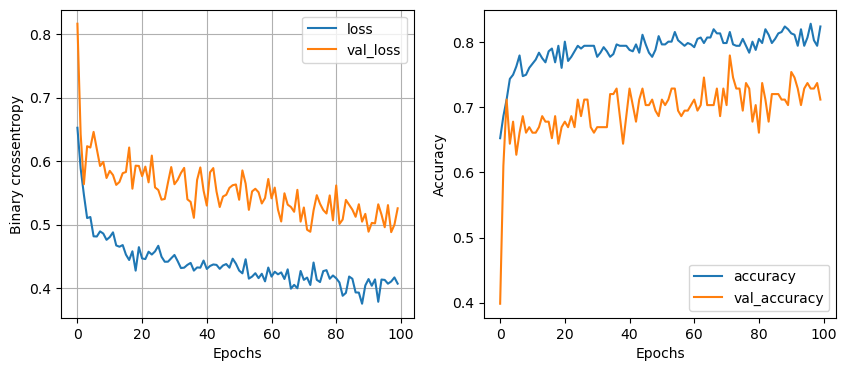

Testing with 16 nodes, dropout 0.2, lr 0.005, batch_size 64


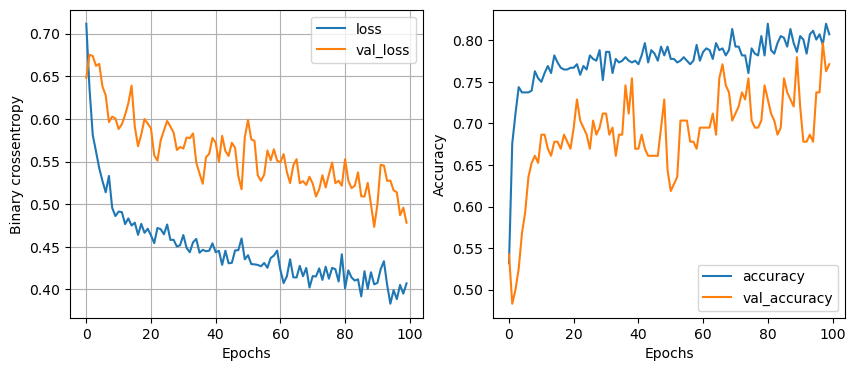

Testing with 16 nodes, dropout 0.2, lr 0.005, batch_size 128


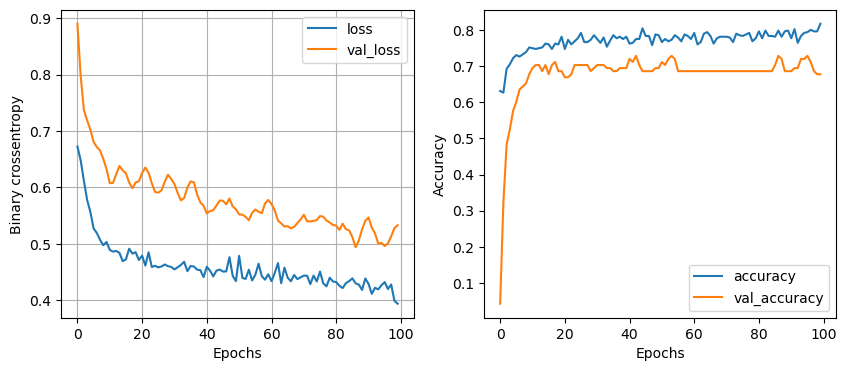

Testing with 16 nodes, dropout 0.2, lr 0.001, batch_size 32


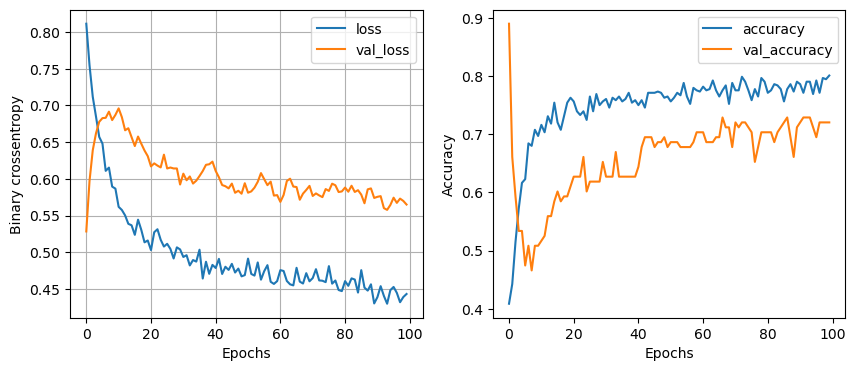

Testing with 16 nodes, dropout 0.2, lr 0.001, batch_size 64


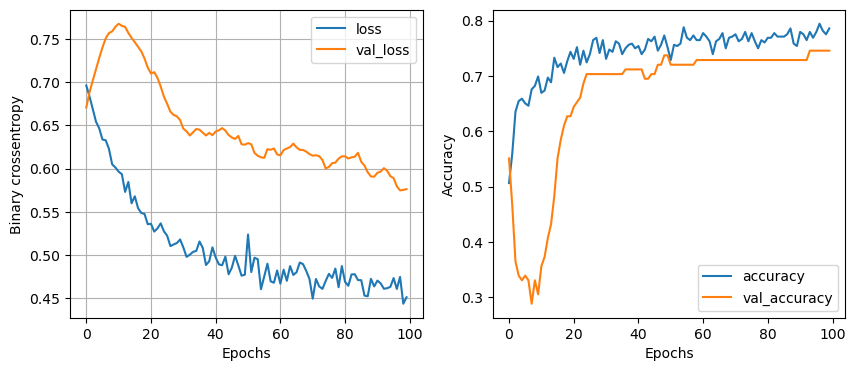

Testing with 16 nodes, dropout 0.2, lr 0.001, batch_size 128


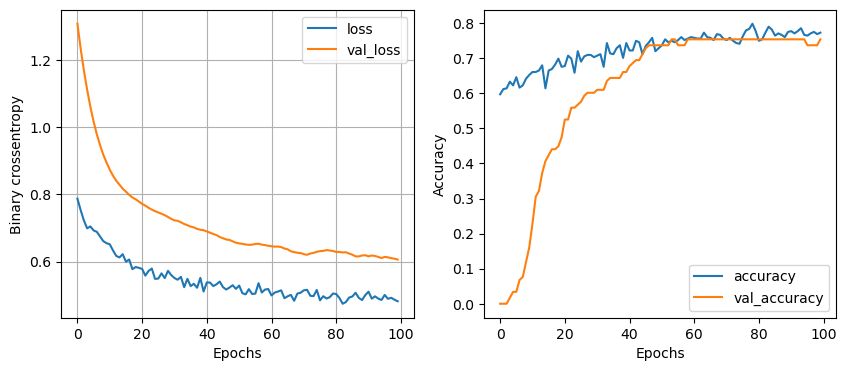

Testing with 32 nodes, dropout 0, lr 0.01, batch_size 32


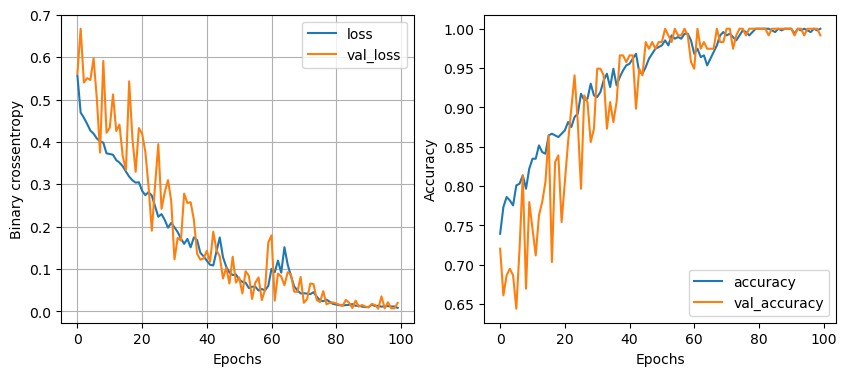

Testing with 32 nodes, dropout 0, lr 0.01, batch_size 64


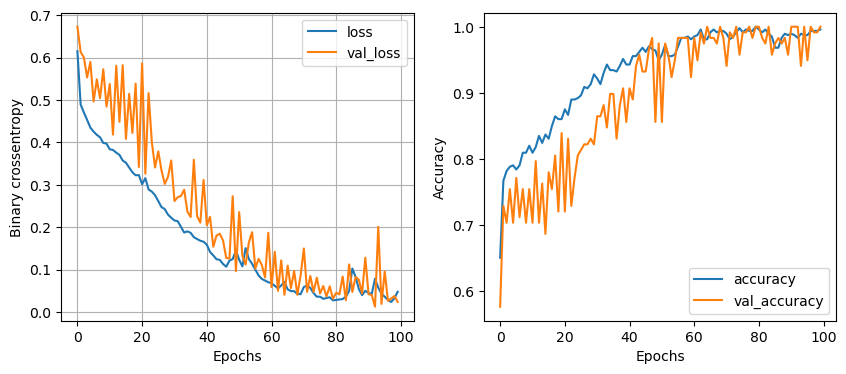

Testing with 32 nodes, dropout 0, lr 0.01, batch_size 128


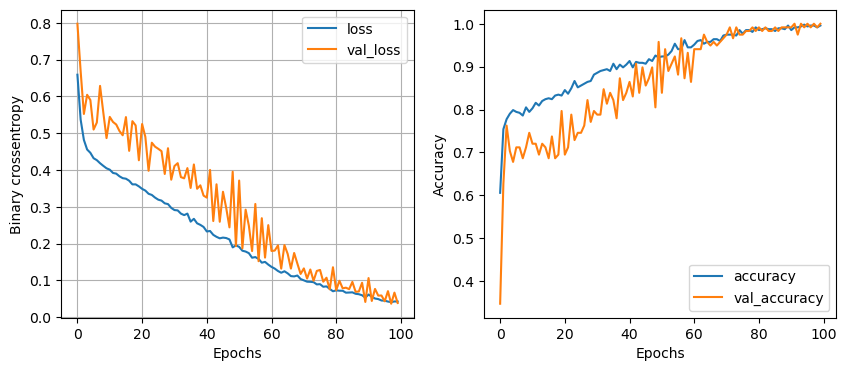

Testing with 32 nodes, dropout 0, lr 0.005, batch_size 32


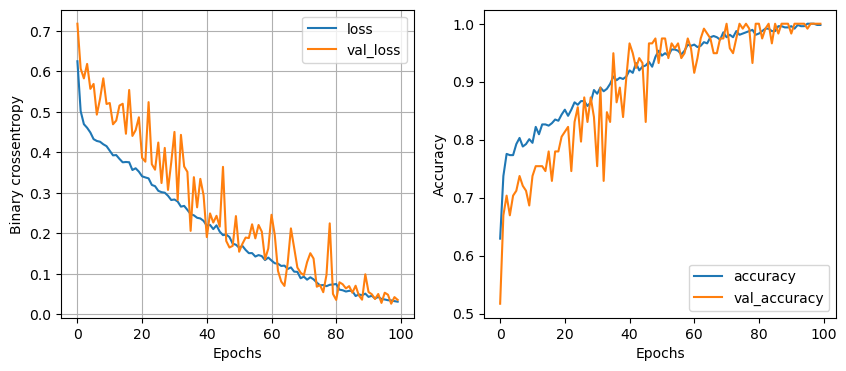

Testing with 32 nodes, dropout 0, lr 0.005, batch_size 64


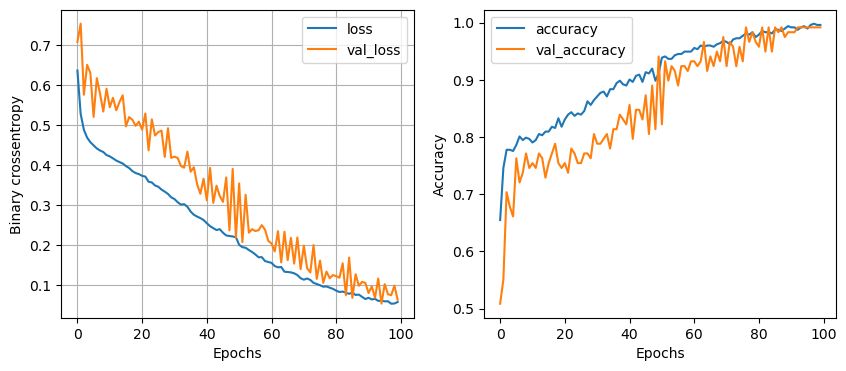

Testing with 32 nodes, dropout 0, lr 0.005, batch_size 128


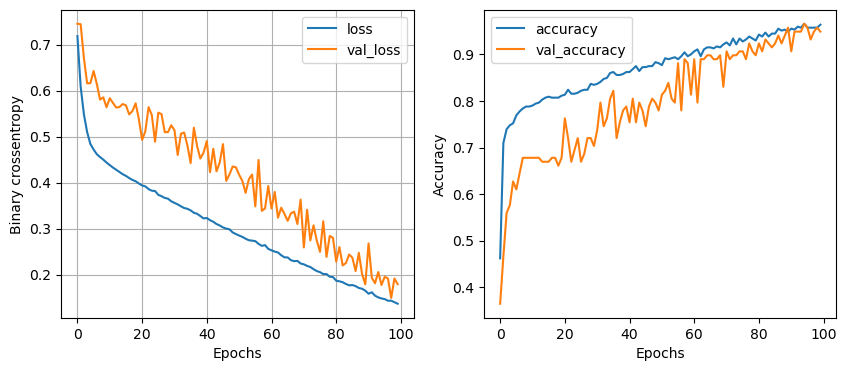

Testing with 32 nodes, dropout 0, lr 0.001, batch_size 32


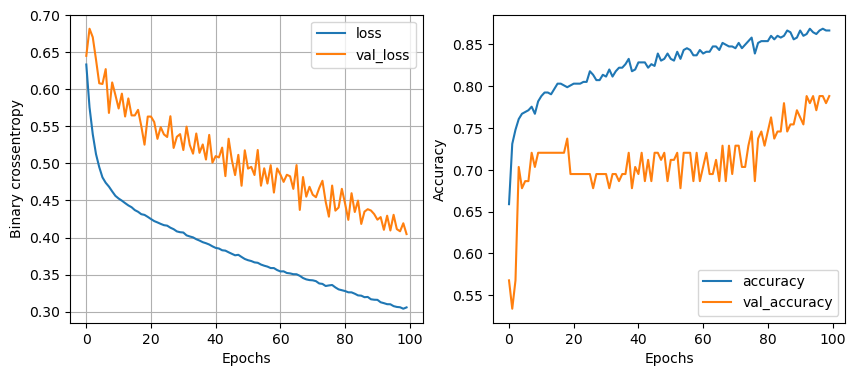

Testing with 32 nodes, dropout 0, lr 0.001, batch_size 64


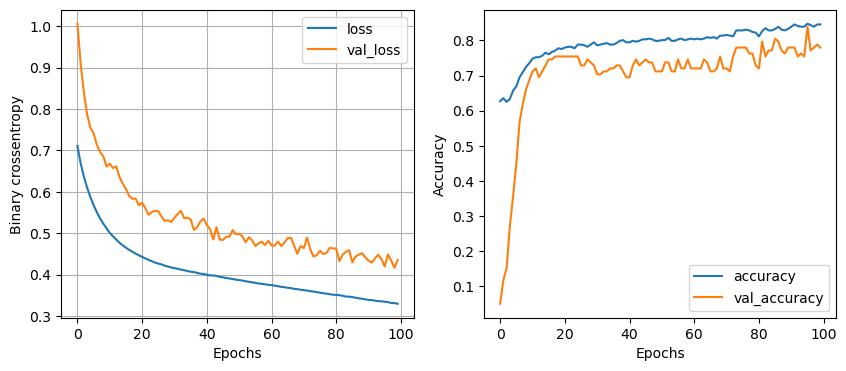

Testing with 32 nodes, dropout 0, lr 0.001, batch_size 128


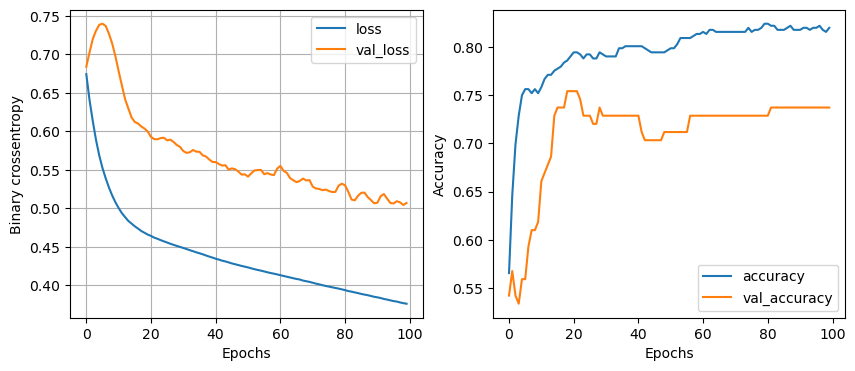

Testing with 32 nodes, dropout 0.2, lr 0.01, batch_size 32


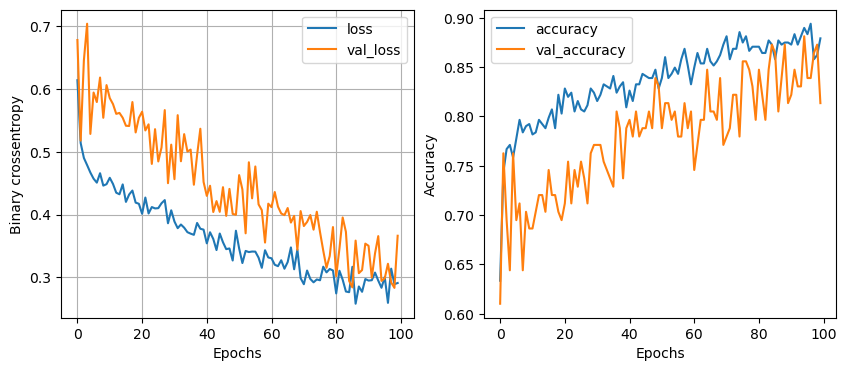

Testing with 32 nodes, dropout 0.2, lr 0.01, batch_size 64


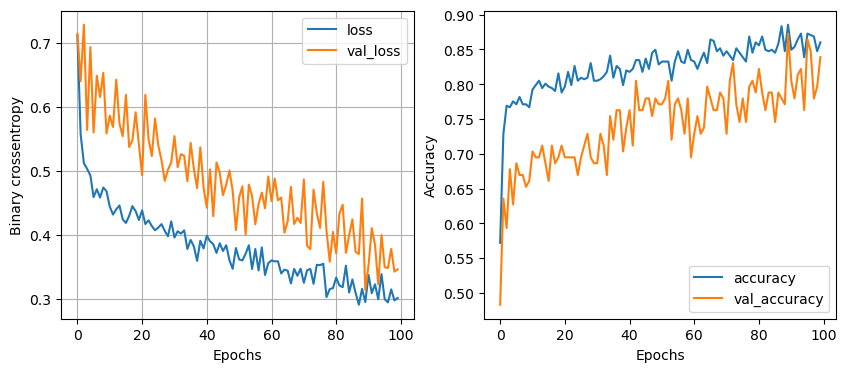

Testing with 32 nodes, dropout 0.2, lr 0.01, batch_size 128


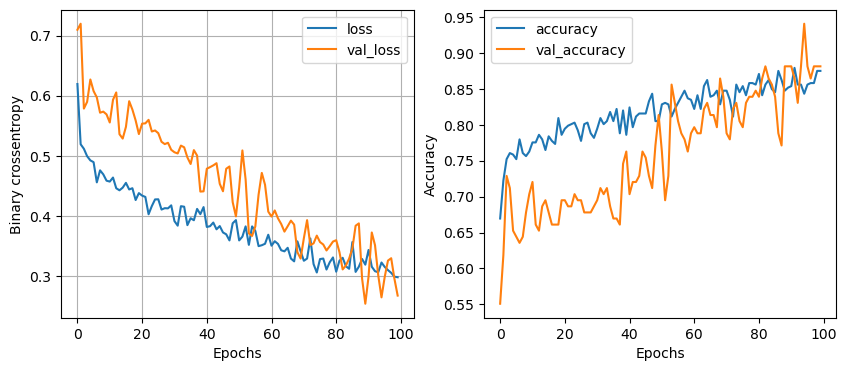

Testing with 32 nodes, dropout 0.2, lr 0.005, batch_size 32


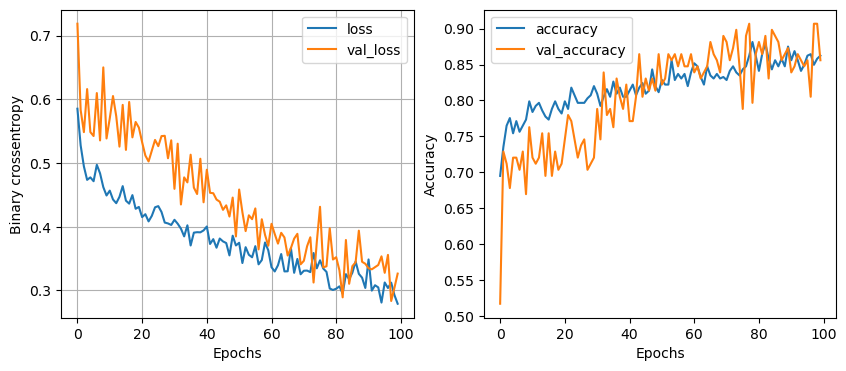

Testing with 32 nodes, dropout 0.2, lr 0.005, batch_size 64


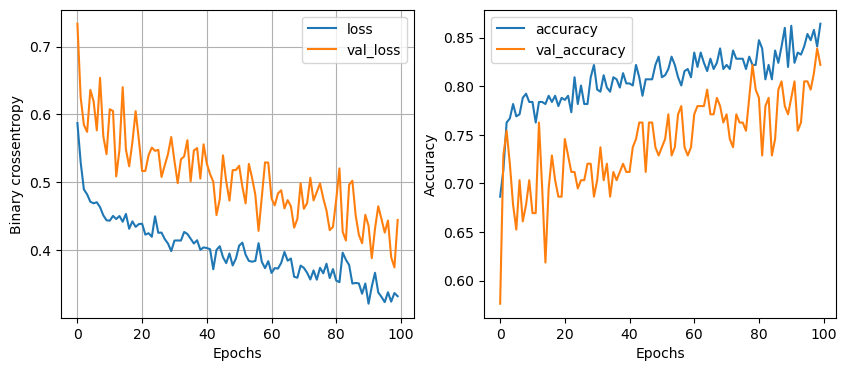

Testing with 32 nodes, dropout 0.2, lr 0.005, batch_size 128


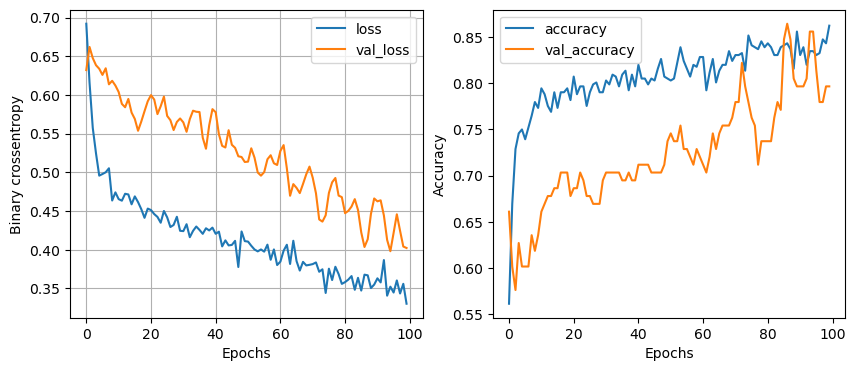

Testing with 32 nodes, dropout 0.2, lr 0.001, batch_size 32


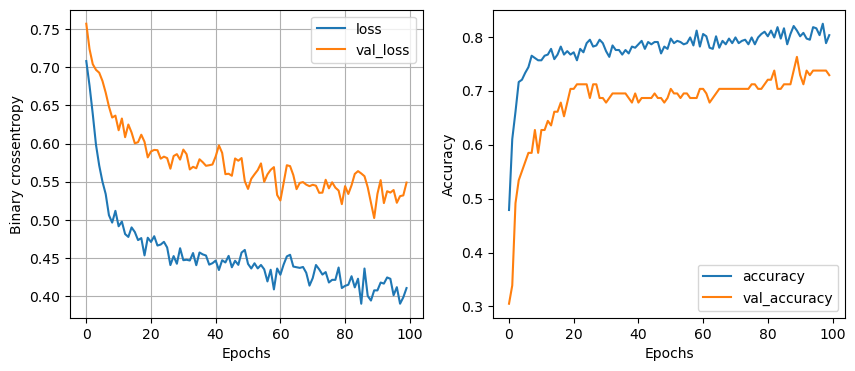

Testing with 32 nodes, dropout 0.2, lr 0.001, batch_size 64


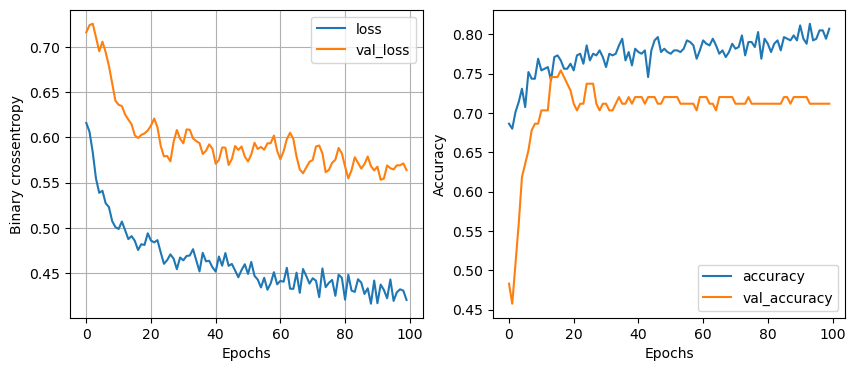

Testing with 32 nodes, dropout 0.2, lr 0.001, batch_size 128


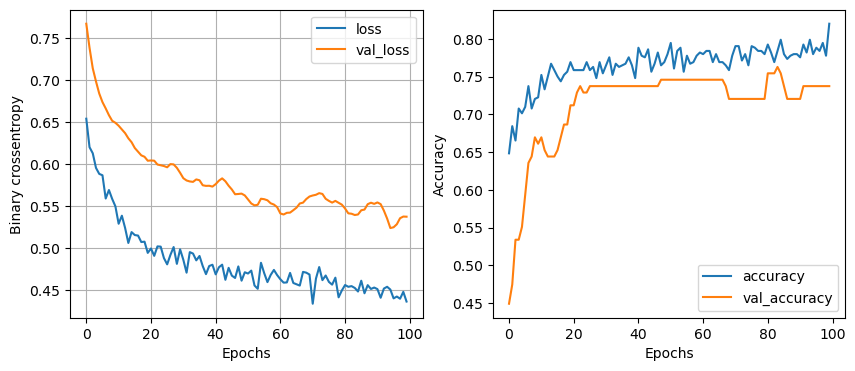

Testing with 64 nodes, dropout 0, lr 0.01, batch_size 32


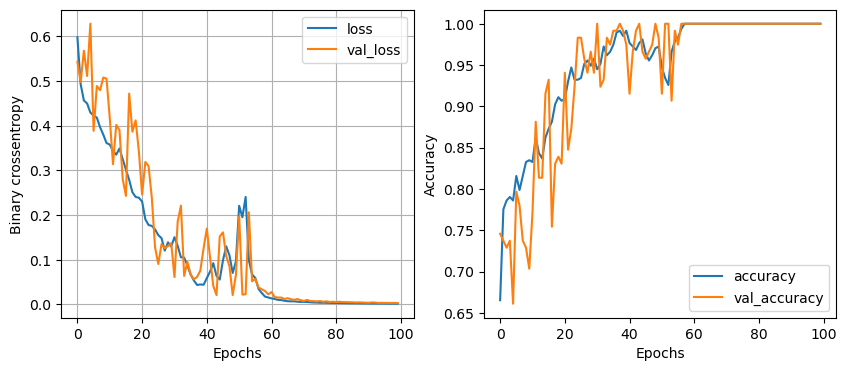

Testing with 64 nodes, dropout 0, lr 0.01, batch_size 64


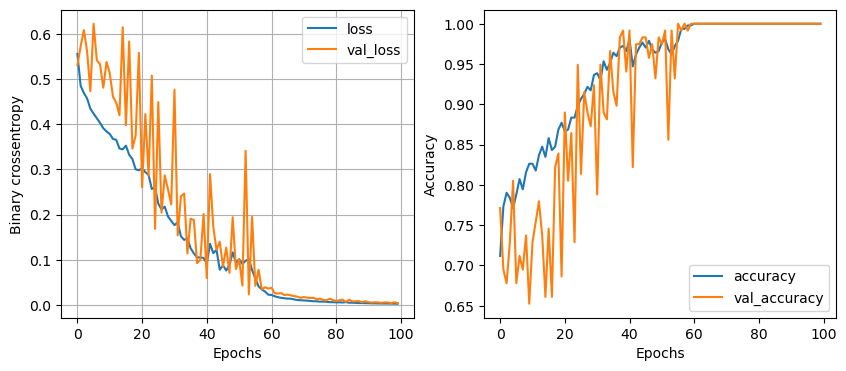

Testing with 64 nodes, dropout 0, lr 0.01, batch_size 128


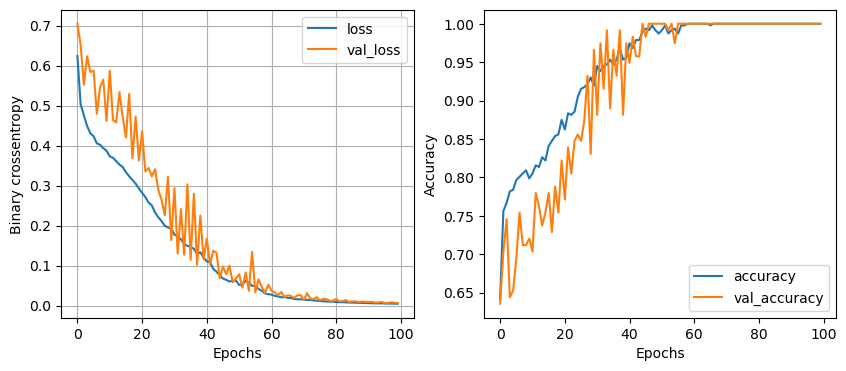

Testing with 64 nodes, dropout 0, lr 0.005, batch_size 32


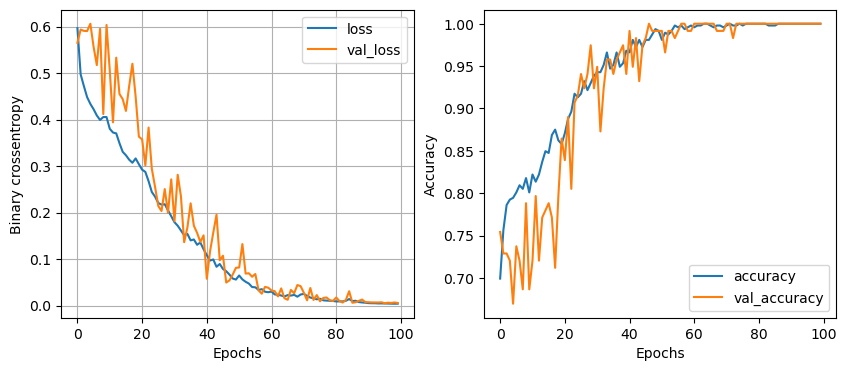

Testing with 64 nodes, dropout 0, lr 0.005, batch_size 64


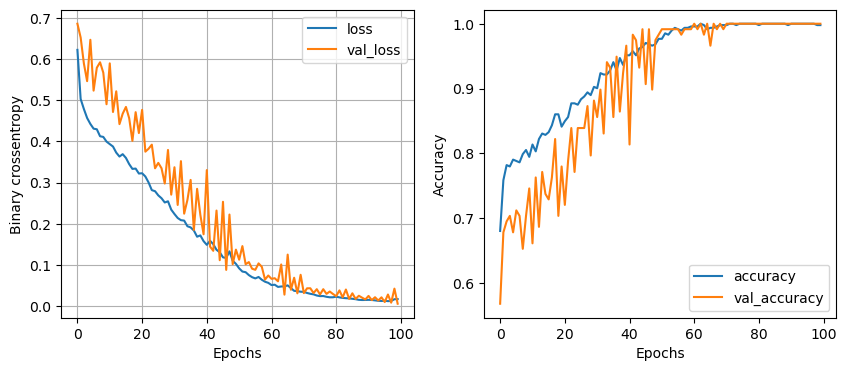

Testing with 64 nodes, dropout 0, lr 0.005, batch_size 128


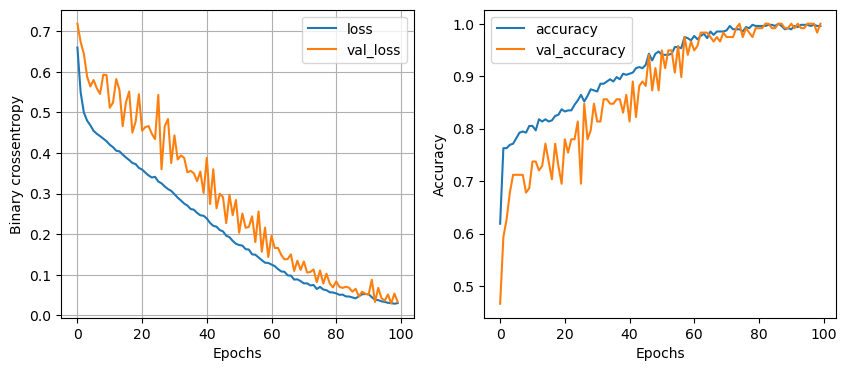

Testing with 64 nodes, dropout 0, lr 0.001, batch_size 32


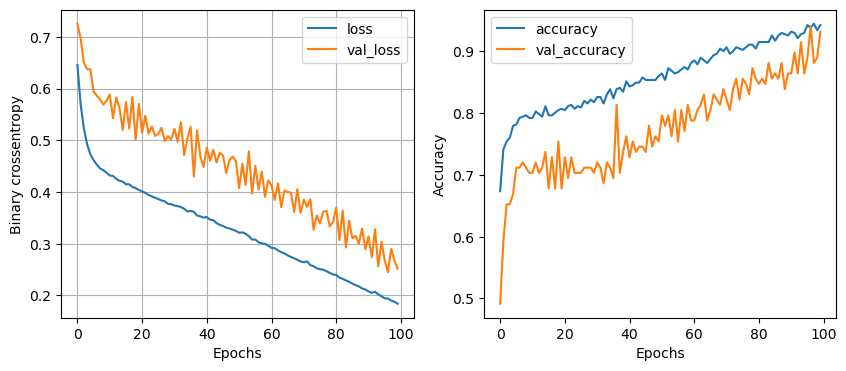

Testing with 64 nodes, dropout 0, lr 0.001, batch_size 64


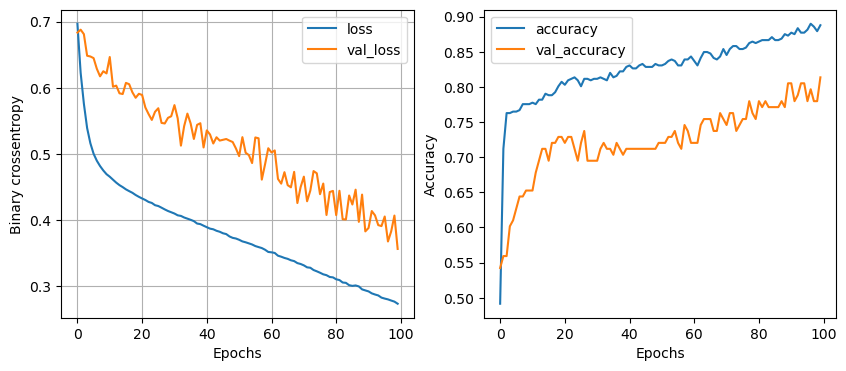

Testing with 64 nodes, dropout 0, lr 0.001, batch_size 128


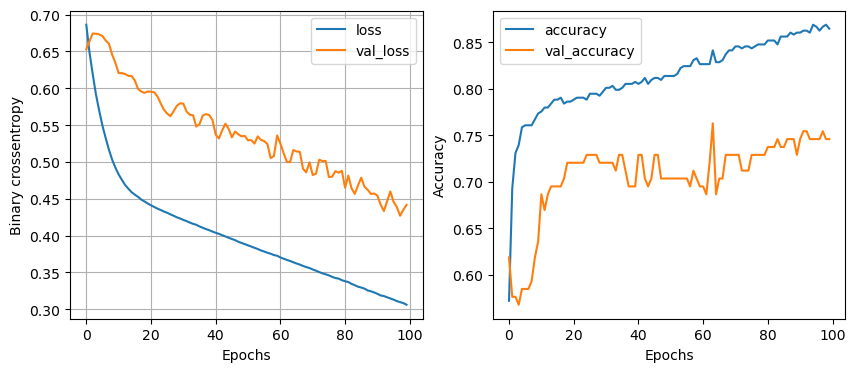

Testing with 64 nodes, dropout 0.2, lr 0.01, batch_size 32


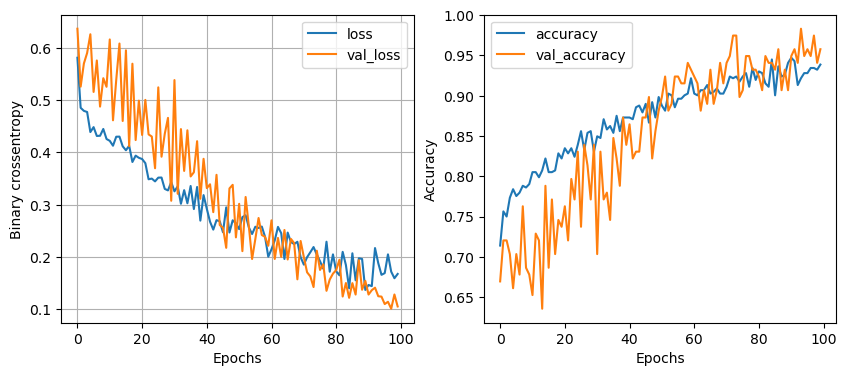

Testing with 64 nodes, dropout 0.2, lr 0.01, batch_size 64


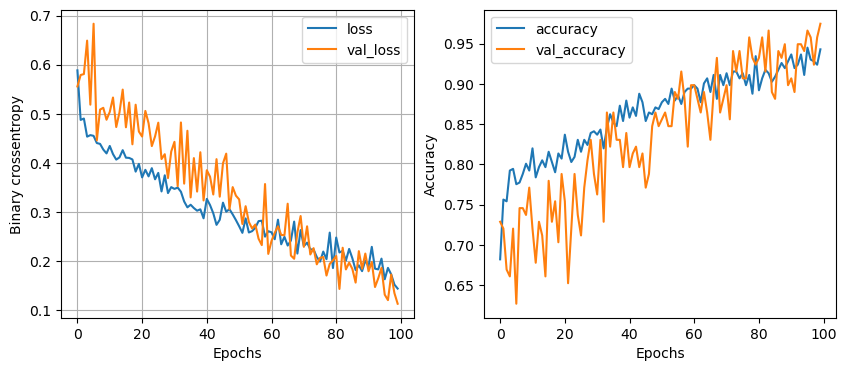

Testing with 64 nodes, dropout 0.2, lr 0.01, batch_size 128


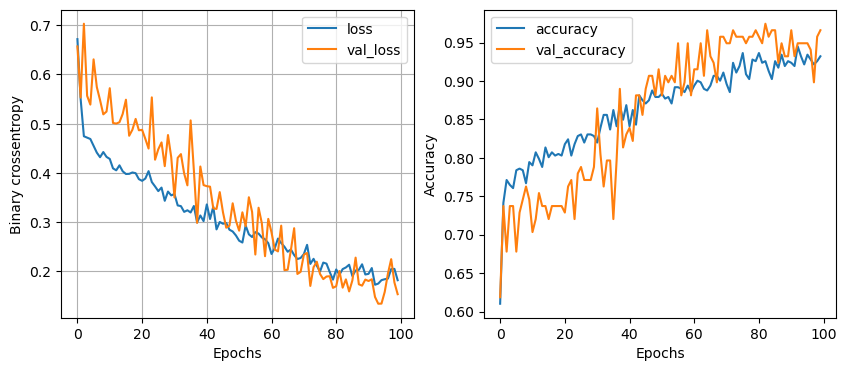

Testing with 64 nodes, dropout 0.2, lr 0.005, batch_size 32


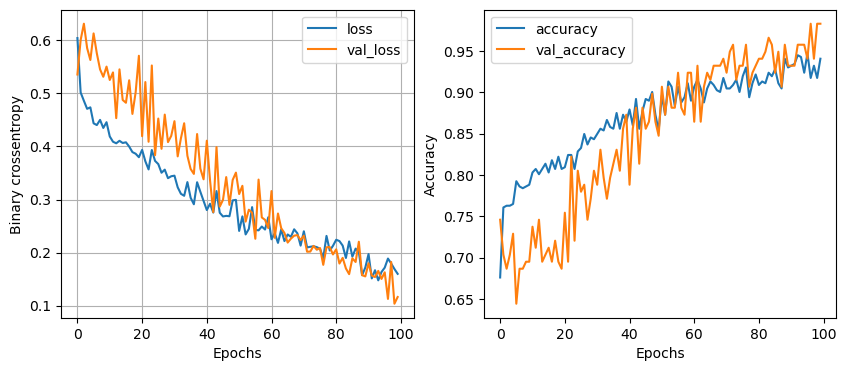

Testing with 64 nodes, dropout 0.2, lr 0.005, batch_size 64


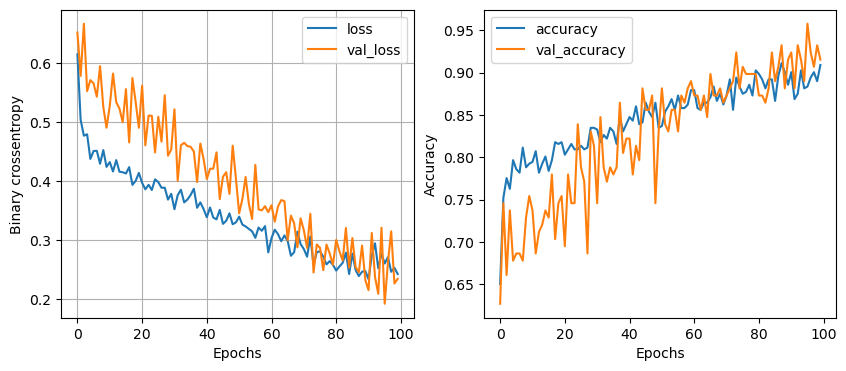

Testing with 64 nodes, dropout 0.2, lr 0.005, batch_size 128


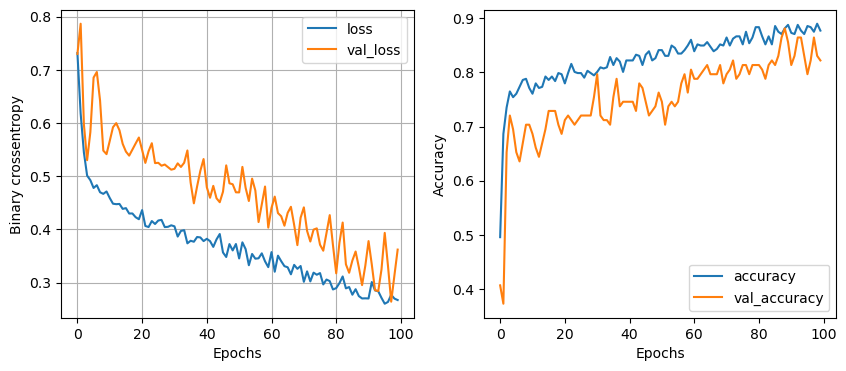

Testing with 64 nodes, dropout 0.2, lr 0.001, batch_size 32


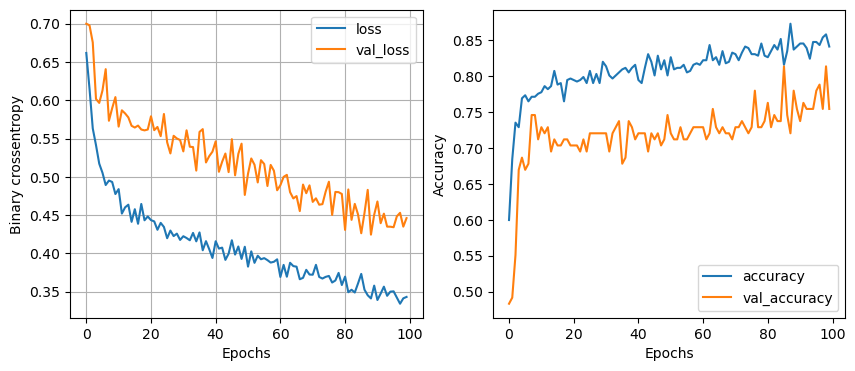

Testing with 64 nodes, dropout 0.2, lr 0.001, batch_size 64


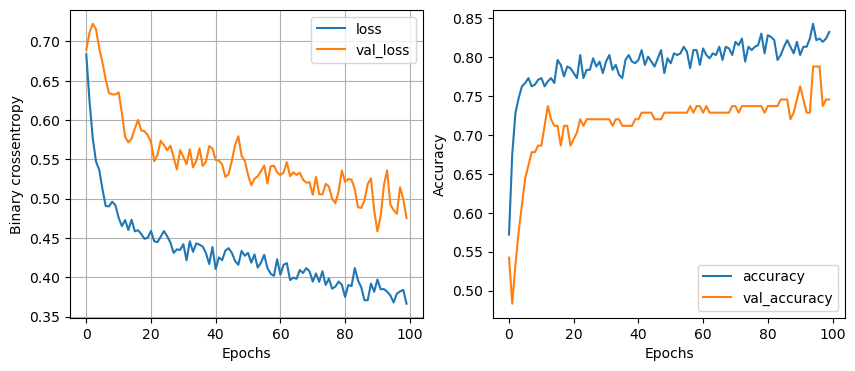

Testing with 64 nodes, dropout 0.2, lr 0.001, batch_size 128


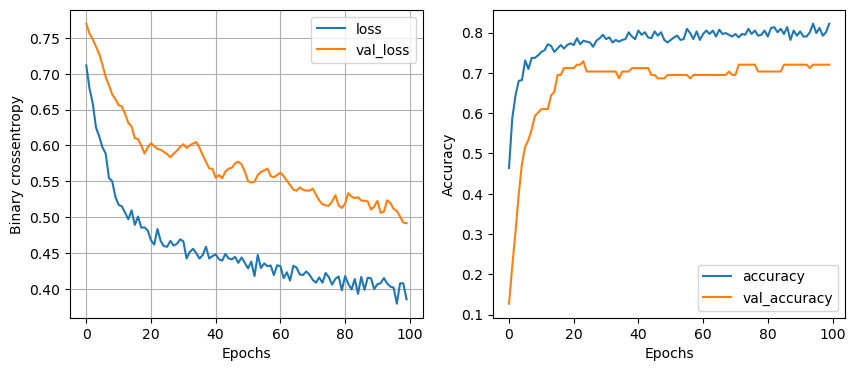

In [478]:
least_validation_loss = float('inf')
best_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"Testing with {num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                
                # Train the model
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                
                # Plot training history
                plot_history(history)
                
                # Evaluate the model on the validation set
                val_loss = model.evaluate(X_valid, y_valid, verbose=0)[0]
                
                # Update the best model if the current one has a lower validation loss
                if val_loss < least_validation_loss:
                    least_validation_loss = val_loss
                    best_model = model

                

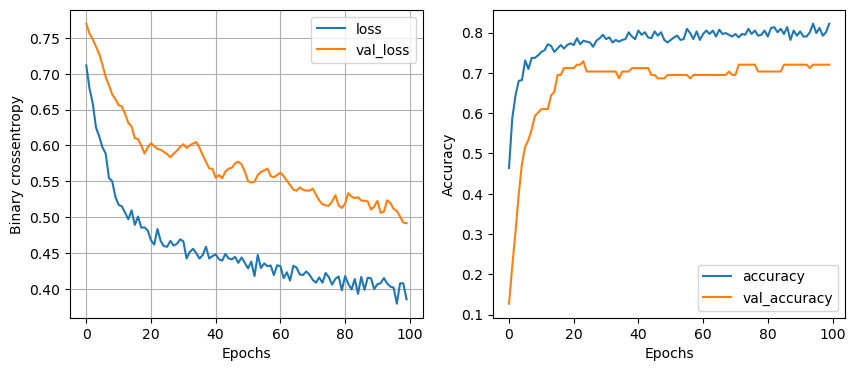

In [479]:
plot_history(history)

In [484]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)
print(classification_report(y_test,y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        99
           1       0.72      0.71      0.72        55

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



In [513]:
#evaluate how well model performs on unseen data
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[84 15]
 [16 39]]
